In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

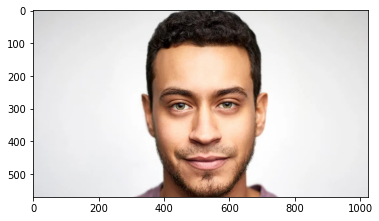

In [2]:
# Read image.
img = cv2.imread('face.jpg', cv2.IMREAD_COLOR)
# cv2.imshow("Face Image", img)
# cv2.destroyAllWindows()
imgMat = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(imgMat)

In [10]:
path = r"haar cascade files/haarcascade_lefteye_2splits.xml"
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
leftEyeDetector = cv2.CascadeClassifier(path)
rightEyeDetector = cv2.CascadeClassifier("/haar cascade files/haarcascade_righteye_2splits.xml")

In [14]:
leftEyeImages = list()
leftEyeImages

[]

[[327 132 394 394]]


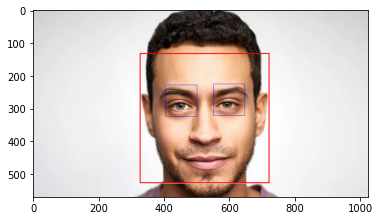

In [13]:
faces = detector.detectMultiScale(img,1.1,5)
print(faces)
# grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
leftEyes = leftEyeDetector.detectMultiScale(img)


# print(leftEyes)
for leftEye in leftEyes:
    x,y,w,h = leftEye
    img = cv2.rectangle(imgMat,(x,y),(x+w,y+h),(0,0,255),1)
#     leftEyeImages.append(imgMat[y:y+h,x:x+w])


    
for face in faces:
    x,y,w,h = face
    img = cv2.rectangle(imgMat,(x,y),(x+w,y+h),(255,0,0),2)
    
# cv2.imshow('Face Detection',img)
plt.imshow(imgMat)

In [12]:
leftEyes = leftEyeDetector.detectMultiScale(img)
print(leftEyes)

[[551 225  96  96]
 [405 228  96  96]]


In [17]:
# for leftEye in leftEyes:
#     x,y,w,h = leftEye
#     img = cv2.rectangle(imgMat,(x,y),(x+w,y+h),(0,0,255),1)
#     leftEyeImages.append(imgMat[y:y+h,x:x+w])
len(leftEyeImages)

2

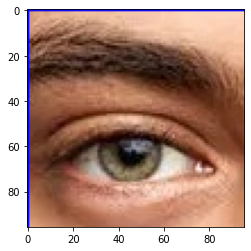

In [16]:
for leftEyeImage in leftEyeImages:
    plt.imshow(leftEyeImage)

In [31]:
firstEye = leftEyeImages[0].copy()

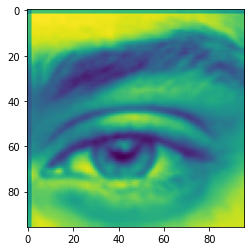

In [21]:
gray = cv2.cvtColor(firstEye, cv2.COLOR_RGB2GRAY)
gray_blurred = cv2.blur(gray, (3, 3))
plt.imshow(gray_blurred)

In [20]:
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)

44 66 14


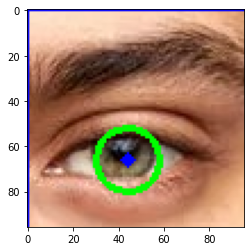

In [32]:
points = detected_circles[0][1]
a,b,r = points
print(a,b,r)
cv2.circle(firstEye, (a, b), r, (0, 255, 0), 2)
cv2.circle(firstEye, (a, b), 1, (0, 0, 255), 3)
plt.imshow(firstEye)

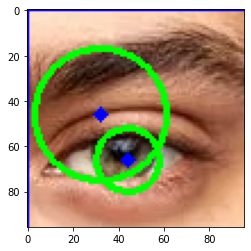

In [23]:
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(firstEye, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(firstEye, (a, b), 1, (0, 0, 255), 3)
plt.imshow(firstEye)